In [46]:
%pylab inline
import matplotlib.pyplot as plt

fname = r'C:\Users\Sierd\Desktop\aeolisdata\LB_series.nc'
fname

Populating the interactive namespace from numpy and matplotlib


'C:\\Users\\Sierd\\Desktop\\aeolisdata\\LB_series.nc'

# netCDF4: basic functionality

In [47]:
import netCDF4

with netCDF4.Dataset(fname,'r') as ds:
    
    # print available variables
    print ds.variables.keys()
    
    # read dimensions
    t = ds.variables['time'][:]
    x = ds.variables['x'][0,:] # the 0 refers to the first (and last) alongshore grid cell
    
    # read initial and final topography
    zb0 = ds.variables['zb'][0,0,:]
    zb1 = ds.variables['zb'][-1,0,:]
    
    # read sediment concentrations at the end of the model domain
    c = ds.variables['Ct'][:,0,-1,:]
    
    # read transport capacity at the end of the model domain
    cu = ds.variables['Cu'][:,0,-1,:]
    
    #read transport concentrations across model domain
    c_s0 = ds.variables['Ct'][0,0,:]

    c_s1 = ds.variables['Ct'][-1,0,:]
    
    # read fractions
    frac = ds.variables['fractions'][:]
    
    ztide = ds.variables['zs'][:]
    print c.shape
    


[u's', u'n', u'x', u'y', u'layers', u'fractions', u'lat', u'lon', u'time', u'x_bounds', u'y_bounds', u'lat_bounds', u'lon_bounds', u'time_bounds', u'uth', u'uth.avg', u'zb', u'zb.avg', u'pickup', u'pickup.avg', u'mass', u'mass.avg', u'zs', u'zs.avg', u'uw', u'uw.avg', u'Cu', u'Cu.avg', u'Ct', u'Ct.avg', u'crs']
(720L, 5L)


## Plot data

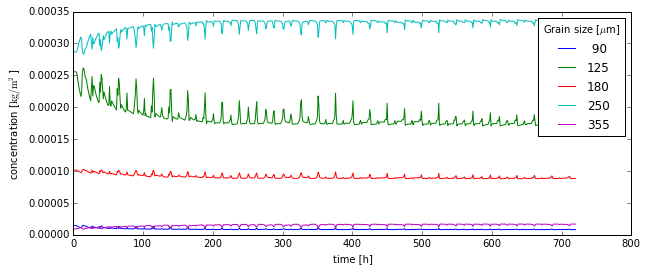

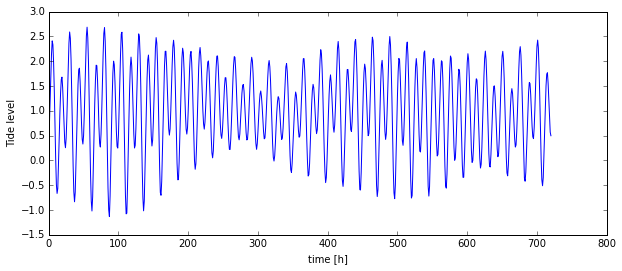

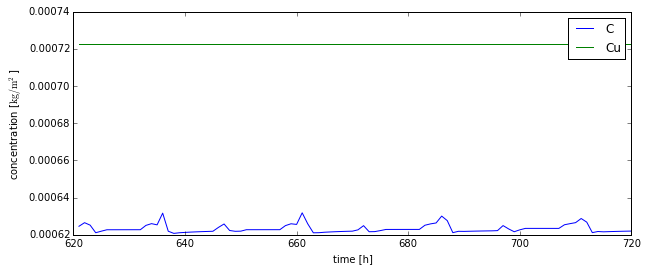

In [48]:

# plot concentrations (one line for each sediment fraction)
fig, axs = plt.subplots(figsize=(10,4))
for i in range(len(frac)):
    axs.plot(t/3600., c[:,i],label='%3.0f' % (frac[i]*1000000))

#axs.plot(t/3600., cu)
axs.set_xlabel('time [h]')
axs.set_ylabel('concentration [$\mathrm{kg/m^2}$]')
plt.legend(title='Grain size [$\mu$m]')
plt.savefig('grain_sizes.png')

# plot tides
fig, axs = plt.subplots(figsize=(10,4))
axs.plot(t[:]/3600., ztide[:,0,0])
#axs.plot(t/3600., c,label=label='%d%%' % (priors[i]*100)))
#axs.plot(t/3600., cu)
axs.set_xlabel('time [h]')
axs.set_ylabel('Tide level')
plt.savefig('tides.png')
#plt.legend(title='Grain size [$\mu$m]')

# plot concentrations (all fractions combined)
fig, axs = plt.subplots(figsize=(10,4))
axs.plot(t[-100:]/3600., np.sum(c,axis=1)[-100:],label='C')#,legend='frac')
axs.plot(t[-100:]/3600., np.mean(cu,axis=1)[-100:],label='Cu')
axs.set_xlabel('time [h]')
axs.set_ylabel('concentration [$\mathrm{kg/m^2}$]')
#axs.set_ylim(0.00025,0.00055)
plt.legend()



In [49]:
#total sediment transport
print np.sum(c)*3600/2650/0.6



1.02464851343


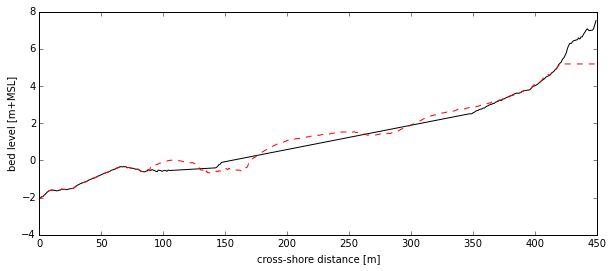

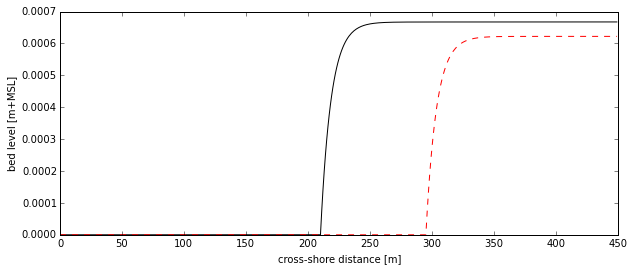

In [38]:
# plot topographies (they are the same)
fig, axs = plt.subplots(figsize=(10,4))
axs.plot(x, zb0, '-k')
axs.plot(x, zb1, '--r')
axs.set_xlabel('cross-shore distance [m]')
axs.set_ylabel('bed level [m+MSL]')

# plot transports (they are the same)
fig, axs = plt.subplots(figsize=(10,4))
axs.plot(x, np.sum(c_s0,axis=1), '-k')
axs.plot(x, np.sum(c_s1,axis=1), '--r')
axs.set_xlabel('cross-shore distance [m]')
axs.set_ylabel('bed level [m+MSL]')

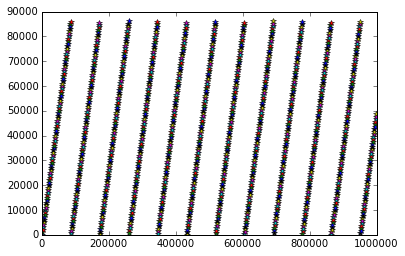

In [73]:
# small check for wind drive transport capacity
for i in range(0,1000000,1000):
    plt.plot(i,np.mod(i,3600*24*1),'*')

# Pandas: store timeseries in Pandas DataFrame using netCDF4

In [68]:
import netCDF4
import pandas as pd

with netCDF4.Dataset(fname, 'r') as ds:
    
    # read dimensions
    t = ds.variables['time'][:]
    
    # read sediment concentrations summed over fractions at the end of the model domain
    c = ds.variables['Ct'][:,0,-1,:].sum(axis=-1)
    
    # read wind speed
    u = ds.variables['uw'][:,0,0]
    
    # create Pandas DataFrame
    df = pd.DataFrame({'u':u, 'c':c}, index=pd.TimedeltaIndex(t, unit='s'))
    
# resample dataframe to daily averaged values and plot
df.resample('1D')

,c,u
0 days 01:00:00,0.000572,10
1 days 01:00:00,0.000550,10
2 days 01:00:00,0.000539,10
3 days 01:00:00,0.000532,10
4 days 01:00:00,0.000527,10
5 days 01:00:00,0.000523,10
6 days 01:00:00,0.000521,10
7 days 01:00:00,0.000518,10
8 days 01:00:00,0.000517,10
9 days 01:00:00,0.000516,10


# XRay: the Holy Mother of all netCDF readers

In [74]:
import xray

with xray.open_dataset(fname) as ds:

    # print available variables
    print ds.variables.keys()
    
    # resample the whole dataset to weekly averages
    dsr = ds.resample('1W', dim='time')
    
    # read concentration time series
    t = dsr.time[:]
    c = dsr.Ct[:,0,-1,:]

[u's', u'n', u'x', u'y', u'layers', u'fractions', u'lat', u'lon', u'time', u'x_bounds', u'y_bounds', u'lat_bounds', u'lon_bounds', u'time_bounds', u'uw', u'uw.avg', u'zb', u'zb.avg', u'pickup', u'pickup.avg', u'mass', u'mass.avg', u'Cu', u'Cu.avg', u'w', u'w.avg', u'zs', u'zs.avg', u'uth', u'uth.avg', u'udir', u'udir.avg', u'Ct', u'Ct.avg', u'crs', u'nv', u'nv2']


## Plot

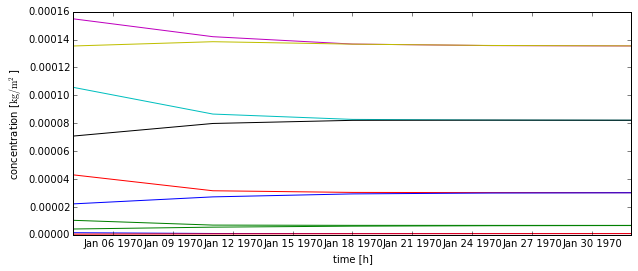

In [75]:
# plot concentrations (note the datetime x-axis! all for free)
fig, axs = plt.subplots(figsize=(10,4))
axs.plot(t, c)
axs.set_xlabel('time [h]')
axs.set_ylabel('concentration [$\mathrm{kg/m^2}$]')